In [3]:
from sklearn.feature_selection import mutual_info_classif
from scipy import sparse
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

In [5]:
# read sparse matrix yang sebelumnya disimpan pada file .npz
tfidf_mat_unigram = sparse.load_npz("tfidf_mat_unigram.npz").toarray()
tfidf_mat_bigram = sparse.load_npz("tfidf_mat_bigram.npz").toarray()
tfidf_mat_trigram = sparse.load_npz("tfidf_mat_trigram.npz").toarray()

In [55]:
tfidf_mat_unigram[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.42199528, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.42960522, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [6]:
# read label/class dari csv preprocessing untuk keperluan fiture selection
tags = pd.read_csv("Text_Preprocessing.csv", usecols=["label"])

In [7]:
# calculate mutual info (MI) / information gain (GI) untuk tiap feature
mi_unigram = mutual_info_classif(tfidf_mat_unigram, tags.label)
mi_bigram = mutual_info_classif(tfidf_mat_bigram, tags.label)
mi_trigram = mutual_info_classif(tfidf_mat_trigram, tags.label)

# normalisasi (L1) untuk semua hasil perhitungan MI/GI
norm_mi_unigram = mi_unigram/np.max(mi_unigram)
norm_mi_bigram = mi_bigram/np.max(mi_bigram)
norm_mi_trigram = mi_trigram/np.max(mi_trigram)

In [8]:
# read json feature name yang sebelumnya disimpan ditahap feature engineering tfidf
import json

def read_json_feature_name(file_name, Keys):
    with open(file_name) as json_config:
        json_object = json.load(json_config)

    param = []
    for item in json_object:
        if item in Keys:
            param.append(json_object[item])

    return param

terms_unigram = read_json_feature_name("tfidf_feature_name_unigram.json", "feature")
terms_bigram = read_json_feature_name("tfidf_feature_name_bigram.json", "feature")
terms_trigram = read_json_feature_name("tfidf_feature_name_trigram.json", "feature")

In [26]:

# sum tfidf frequency of each term through documents
sums_unigram = tfidf_mat_unigram.sum(axis=0)
sums_bigram = tfidf_mat_bigram.sum(axis=0)
sums_trigram = tfidf_mat_trigram.sum(axis=0)

def generate_ranking(terms, sums):
    # connecting term to its sums frequency
    data = []
    for col, term in enumerate(terms):
        data.append((term, sums[col] ))
    ranking = pd.DataFrame(data, columns=['term','rank'])
    return ranking.sort_values('rank', ascending=False)


ranking_unigram = generate_ranking(terms_unigram[0], sums_unigram)
ranking_bigram = generate_ranking(terms_bigram[0], sums_bigram)
ranking_trigram = generate_ranking(terms_trigram[0], sums_trigram)

In [27]:
# apply norm_mi to Dataframe rangking
ranking_unigram["MI_unigram"] = ranking_unigram.apply(lambda x: norm_mi_unigram[x.name], axis=1)
ranking_bigram["MI_bigram"] = ranking_bigram.apply(lambda x: norm_mi_bigram[x.name], axis=1)
ranking_trigram["MI_trigram"] = ranking_trigram.apply(lambda x: norm_mi_trigram[x.name], axis=1)

In [58]:
# show top 10 rank (total tfidf) unigram
ranking_unigram.head(10)

,term,rank,MI_unigram
405,jokowi,2810.774570,1.000000
100,banjir,1125.122587,0.000000
647,nkri,964.091246,0.200205
51,aniesbaswedan,890.887670,0.648163
90,bakar,847.791510,0.396956
351,hutan,828.070378,0.632264
358,indonesia,798.299656,0.000000
991,ya,784.733681,0.423944
382,jakarta,693.375483,0.211443
50,anies,677.089485,0.717490


In [59]:
# show top 10 rank (total tfidf) unigram
ranking_bigram.head(10)

,term,rank,MI_bigram
105,bakar hutan,2263.531013,0.319440
636,msaiddidu jokowi,1156.374984,0.764517
942,virus corona,770.668178,0.975964
752,presiden jokowi,764.697556,0.000000
676,nkri harga,582.584422,0.259532
339,harga mati,528.078010,0.187247
121,banjir jakarta,525.629187,0.530760
420,jokowi bnpbindonesia,455.223983,0.217802
59,anies baswedan,443.787179,0.074170
354,hutan australia,438.985196,0.000000


In [60]:
# show top 10 rank (total tfidf) unigram
ranking_trigram.head(10)

,term,rank,MI_trigram
92,bakar hutan australia,776.463516,0.414996
316,harisazhar jokowi bnpbindonesia,767.762778,0.057711
625,nkri harga mati,742.093440,0.248203
100,bakar hutan lahan,307.134010,0.000000
301,gtgt jatengsambutkhilafah ltltn,284.107025,0.000000
378,jatengsambutkhilafah ltltn menujusyariahkaffah,160.139607,0.286381
970,whosearo indonesiageneva menluri,157.776877,0.000000
421,jokowi who whoindonesia,157.776877,0.000000
968,who whoindonesia whosearo,157.776877,0.000000
969,whoindonesia whosearo indonesiageneva,157.776877,0.000000


In [32]:
# get all column index on norm_mi below 0.01 
def get_column_idx(norm_mi, threshold):
    return [i for i, mi_item in enumerate(norm_mi) if mi_item < threshold]

column_idx_unigram = get_column_idx(norm_mi_unigram, 0.01)
column_idx_bigram = get_column_idx(norm_mi_bigram, 0.01)
column_idx_trigram = get_column_idx(norm_mi_trigram, 0.01)


# delete sparse matrix tfidf_mat where column=column_id, save into new array
tfidf_mat_selection_unigram = np.delete(tfidf_mat_unigram, column_idx_unigram ,1)
tfidf_mat_selection_bigram = np.delete(tfidf_mat_bigram, column_idx_bigram ,1)
tfidf_mat_selection_trigram = np.delete(tfidf_mat_trigram, column_idx_trigram ,1)

# number of feature after reduction
max_features_unigram = tfidf_mat_selection_unigram.shape[1]
max_features_bigram = tfidf_mat_selection_bigram.shape[1]
max_features_trigram = tfidf_mat_selection_trigram.shape[1]

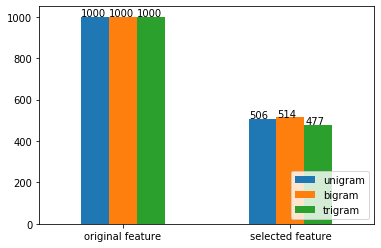

In [54]:
# plot number of feature on bar chart

groups = [[tfidf_mat_unigram.shape[1], 
           tfidf_mat_bigram.shape[1], 
           tfidf_mat_trigram.shape[1]], 
          
          [tfidf_mat_selection_unigram.shape[1], 
           tfidf_mat_selection_bigram.shape[1], 
           tfidf_mat_selection_trigram.shape[1]]]

group_labels = ['original feature', 'selected feature']

# Convert data to pandas DataFrame.
df = pd.DataFrame(groups, index=group_labels, columns=["unigram", "bigram", "trigram"])

# plot into bar chart
ax = df.plot(kind='bar', rot=0) 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

ax.legend(loc='lower right')

# Save to Excel

In [62]:
ranking_unigram.to_excel("Feature_Selection_Information_Gain_Unigram.xlsx")
ranking_bigram.to_excel("Feature_Selection_Information_Gain_Bigram.xlsx")
ranking_trigram.to_excel("Feature_Selection_Information_Gain_Trigram.xlsx")

# Save Sparse Matrix Setelah Feature Selection kedalam file .NPZ

In [63]:
from scipy import sparse

# save sparse matrix unigram, bigram and trigram to .npz file
sparse.save_npz("tfidf_mat_selection_unigram.npz", sparse.csr_matrix(tfidf_mat_selection_unigram))
sparse.save_npz("tfidf_mat_selection_bigram.npz", sparse.csr_matrix(tfidf_mat_selection_bigram))
sparse.save_npz("tfidf_mat_selection_trigram.npz", sparse.csr_matrix(tfidf_mat_selection_trigram))

# Save feature name after feature selection to JSON file

In [68]:
import json

def get_dict_feature_name(terms):
    feature_name = {}
    feature_name['feature'] = terms
    return feature_name


def save_to_json(Data, json_filename):
    with open(json_filename, mode='w') as json_config:
        json.dump(Data, json_config)
        
def get_selected_feature(norm_mi, column_idx, terms):
    selected_idx = [j for j in range(len(norm_mi)) if j not in column_idx]
    selected_features = []
    for idx in selected_idx:
        selected_features.append(terms[0][idx])
    return selected_features

# get feature name after feature selection
terms_selection_unigram = get_selected_feature(norm_mi_unigram, column_idx_unigram, terms_unigram)
terms_selection_bigram = get_selected_feature(norm_mi_bigram, column_idx_bigram, terms_bigram)
terms_selection_trigram = get_selected_feature(norm_mi_trigram, column_idx_trigram, terms_trigram)

# save feature name unigram, bigram and trigram as json file
save_to_json( get_dict_feature_name(terms_selection_unigram),"tfidf_feature_name_selection_unigram.json")
save_to_json( get_dict_feature_name(terms_selection_bigram),"tfidf_feature_name_selection_bigram.json")
save_to_json( get_dict_feature_name(terms_selection_trigram),"tfidf_feature_name_selection_trigram.json")